In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [37]:
# Check if there are any non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [38]:
# Drop the null values and save it into the original data frame.
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [39]:
from sklearn.model_selection import train_test_split

# Let 'X' be the data frame without the target variable.
X = data.drop(['median_house_value'], axis=1)
# Let 'y' be the data frame with only the target variable.
y = data['median_house_value']

# Split the data into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
# Join the train data for exploration.
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
274,-122.18,37.79,39.0,617.0,95.0,236.0,106.0,5.2578,NEAR BAY,253000.0
1583,-121.97,37.87,4.0,1029.0,126.0,416.0,122.0,13.4883,INLAND,500001.0
11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,NEAR BAY,241800.0
6285,-117.93,34.04,23.0,6361.0,1168.0,4580.0,1109.0,4.9342,<1H OCEAN,181000.0
2009,-119.82,36.72,25.0,2581.0,528.0,1642.0,509.0,1.6435,INLAND,52600.0
...,...,...,...,...,...,...,...,...,...,...
13150,-121.47,36.92,27.0,2049.0,417.0,1230.0,336.0,4.6477,INLAND,265900.0
7484,-118.21,33.93,41.0,619.0,138.0,636.0,145.0,2.5083,<1H OCEAN,118100.0
177,-122.24,37.80,47.0,2046.0,588.0,1213.0,554.0,2.6292,NEAR BAY,182700.0
1379,-122.07,38.00,37.0,978.0,202.0,462.0,184.0,3.6250,NEAR BAY,156300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

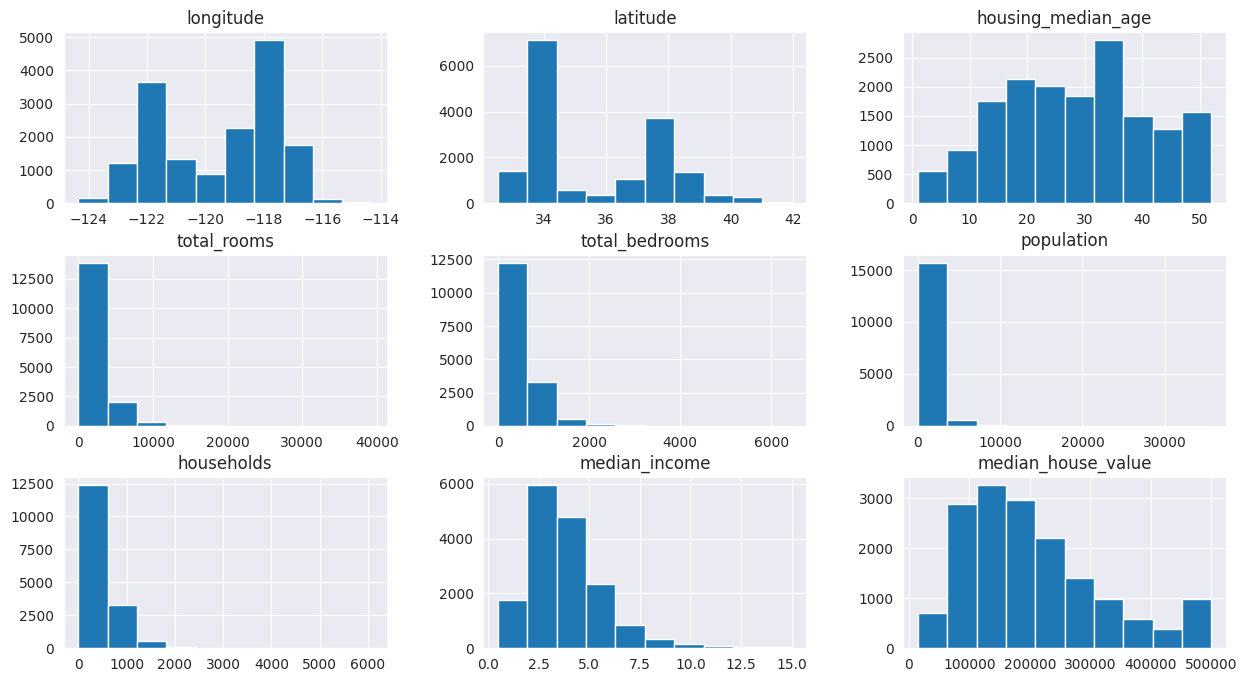

In [41]:
# Draw a histogram to show comparison
train_data.hist(figsize=(15, 8))

In [43]:
# Get dummy variables for ocean proximity.
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
274,-122.18,37.79,39.0,617.0,95.0,236.0,106.0,5.2578,253000.0,False,False,False,True,False
1583,-121.97,37.87,4.0,1029.0,126.0,416.0,122.0,13.4883,500001.0,False,True,False,False,False
11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,False,False,False,True,False
6285,-117.93,34.04,23.0,6361.0,1168.0,4580.0,1109.0,4.9342,181000.0,True,False,False,False,False
2009,-119.82,36.72,25.0,2581.0,528.0,1642.0,509.0,1.6435,52600.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13150,-121.47,36.92,27.0,2049.0,417.0,1230.0,336.0,4.6477,265900.0,False,True,False,False,False
7484,-118.21,33.93,41.0,619.0,138.0,636.0,145.0,2.5083,118100.0,True,False,False,False,False
177,-122.24,37.80,47.0,2046.0,588.0,1213.0,554.0,2.6292,182700.0,False,False,False,True,False
1379,-122.07,38.00,37.0,978.0,202.0,462.0,184.0,3.6250,156300.0,False,False,False,True,False


<Axes: >

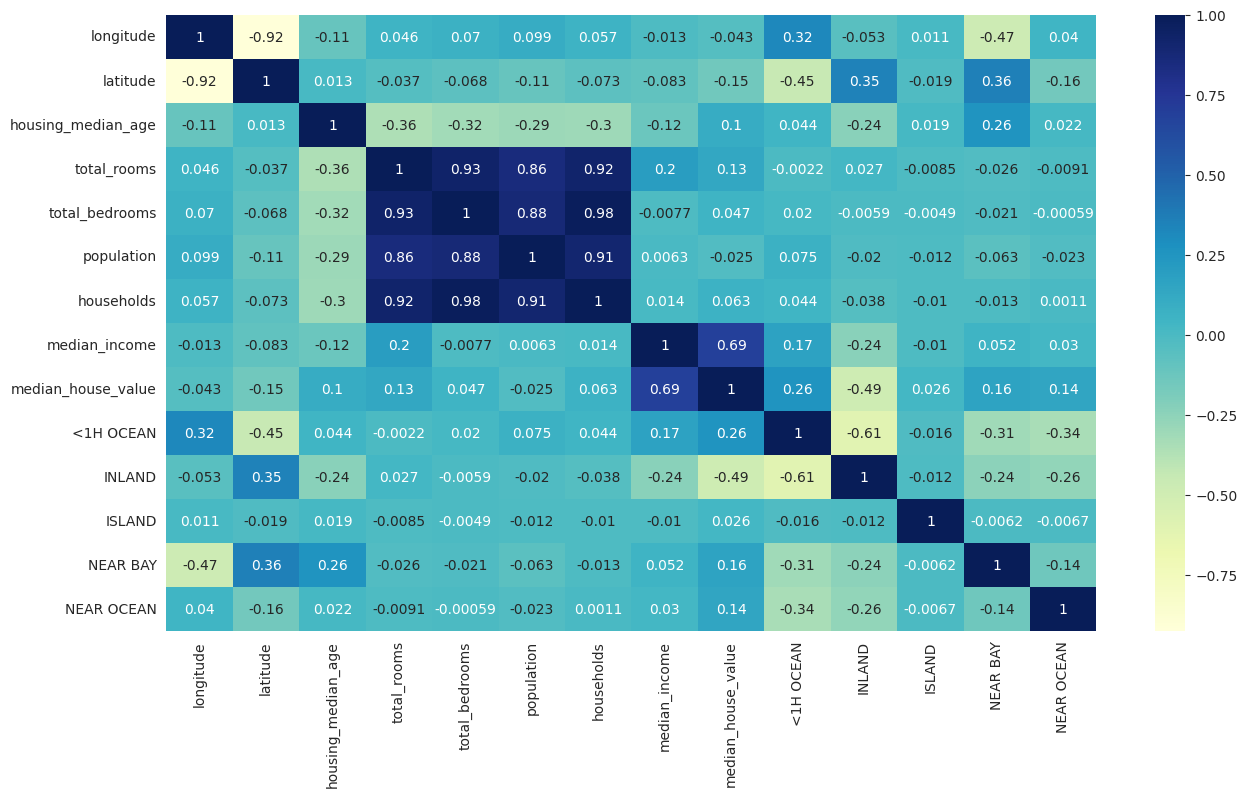

In [44]:
# Draw heatmap to see the dependence of one factor on another.
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

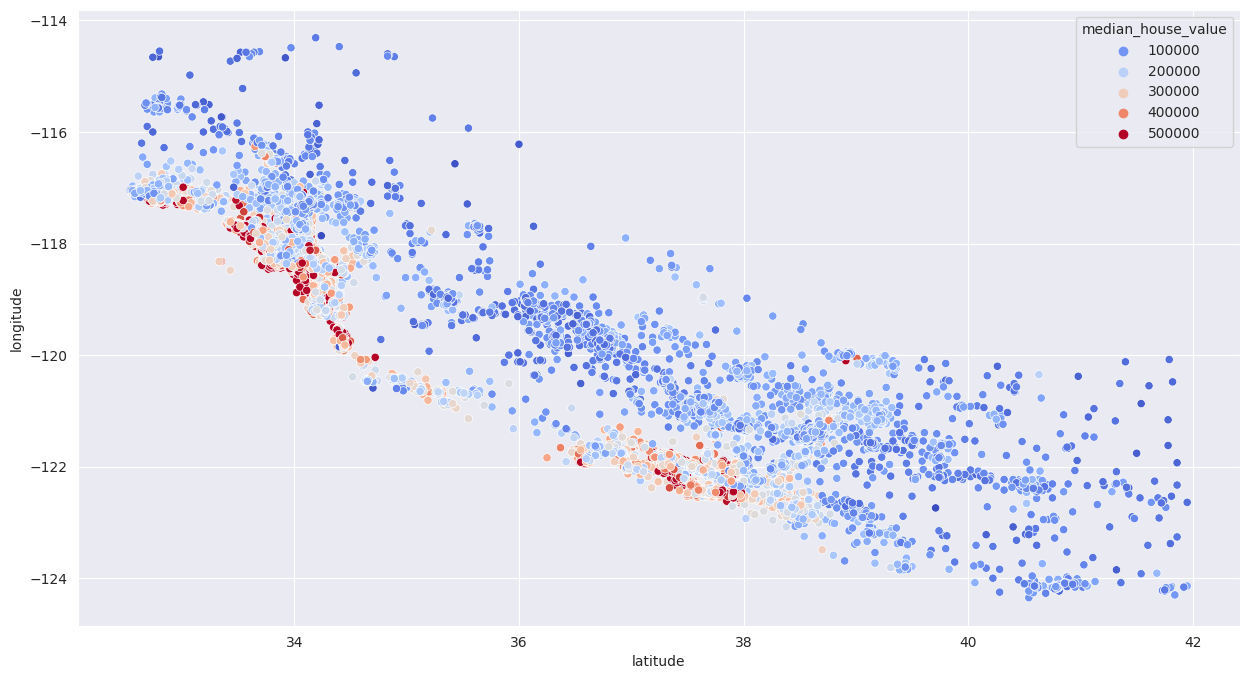

In [45]:
# Below scatter plot shows the difference in prices according to the latitude and longitude.
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")